# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')
print("Semua pustaka telah berhasil diimpor.")

Semua pustaka telah berhasil diimpor.


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Memuat dataset hasil clustering
dataset = pd.read_csv("Hasil_Clustering_Final.csv")

# Menampilkan informasi dataset
print("Informasi Dataset:")
print(dataset.info())

# Melihat 5 baris pertama
print("\n5 Baris Pertama Dataset:")
print(dataset.head())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Total_Items        100000 non-null  float64
 1   Total_Cost         100000 non-null  float64
 2   Payment_Method     100000 non-null  int64  
 3   City               100000 non-null  int64  
 4   Store_Type         100000 non-null  int64  
 5   Discount_Applied   100000 non-null  bool   
 6   Customer_Category  100000 non-null  int64  
 7   Season             100000 non-null  int64  
 8   Promotion          100000 non-null  int64  
 9   Cost_Category      100000 non-null  object 
 10  Cluster            100000 non-null  int64  
dtypes: bool(1), float64(2), int64(7), object(1)
memory usage: 7.7+ MB
None

5 Baris Pertama Dataset:
   Total_Items  Total_Cost  Payment_Method  City  Store_Type  \
0    -0.869165   -1.306680               1     4           3   
1   

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
# Memisahkan fitur (X) dan target (y)
X = dataset.drop(columns=['Cluster'])  # Cluster sebagai target
y = dataset['Cluster']  # Target

# Encoding kolom kategorikal pada fitur
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
if len(categorical_cols) > 0:
    print("\nKolom Kategorikal yang Ditemukan:", list(categorical_cols))
    encoder = LabelEncoder()
    for col in categorical_cols:
        X[col] = encoder.fit_transform(X[col])
        print(f"Kolom '{col}' telah di-encode.")
else:
    print("\nTidak ada kolom kategorikal yang perlu di-encode.")

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Menampilkan jumlah data pada masing-masing set
print("\nJumlah Data:")
print("Training Set:", X_train.shape)
print("Testing Set:", X_test.shape)

# Standardisasi data numerik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nStandardisasi data berhasil dilakukan.")


Kolom Kategorikal yang Ditemukan: ['Discount_Applied', 'Cost_Category']
Kolom 'Discount_Applied' telah di-encode.
Kolom 'Cost_Category' telah di-encode.

Jumlah Data:
Training Set: (80000, 10)
Testing Set: (20000, 10)

Standardisasi data berhasil dilakukan.


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [4]:
# Logistic Regression
logistic_model = LogisticRegression(random_state=42, max_iter=500)
logistic_model.fit(X_train, y_train)
print("\nModel Logistic Regression telah dilatih.")

# Random Forest
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
random_forest_model.fit(X_train, y_train)
print("Model Random Forest telah dilatih.")

# Menampilkan hasil latih
print("\nHasil Akurasi Data Latih:")
print(f"Logistic Regression: {logistic_model.score(X_train, y_train):.4f}")
print(f"Random Forest: {random_forest_model.score(X_train, y_train):.4f}")


Model Logistic Regression telah dilatih.
Model Random Forest telah dilatih.

Hasil Akurasi Data Latih:
Logistic Regression: 1.0000
Random Forest: 1.0000


### **Alasan Memilih Algoritma**
Setelah mencoba berbagai algoritma, dua algoritma berikut dipilih karena performa yang konsisten tinggi dan karakteristik data:

1. **Logistic Regression**:
   - Dipilih karena kesederhanaannya dan interpretabilitas yang tinggi.
   - Cocok untuk dataset yang memiliki distribusi cluster yang terdefinisi dengan baik, di mana hubungan antar fitur cenderung linier.
   - Memberikan informasi tentang bobot tiap fitur, sehingga membantu memahami hubungan antara fitur dan target.

2. **Random Forest**:
   - Dipilih karena kekuatan ensemble dalam menangani data kompleks dengan hubungan non-linier.
   - Mampu menangkap interaksi antar fitur tanpa memerlukan normalisasi data.
   - Robust terhadap noise dan fitur tidak penting, yang membuatnya lebih fleksibel dalam menangani data clustering.

#### Algoritma yang Tidak Terpilih:
- **K-Nearest Neighbors (KNN)**: Memiliki performa yang tidak konsisten dan membutuhkan tuning parameter intensif seperti jumlah tetangga.
- **Decision Tree**: Cenderung overfit pada data latih, yang dapat memengaruhi generalisasi pada data uji.
- **Support Vector Machine (SVM)**: Membutuhkan lebih banyak waktu untuk komputasi pada dataset besar.


## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.


Hasil Evaluasi pada Data Uji:
Logistic Regression - Accuracy: 1.0000, F1-Score: 1.0000
Random Forest - Accuracy: 1.0000, F1-Score: 1.0000

Confusion Matrix - Logistic Regression:
[[4982    0    0    0]
 [   0 5050    0    0]
 [   0    0 4981    0]
 [   0    0    0 4987]]


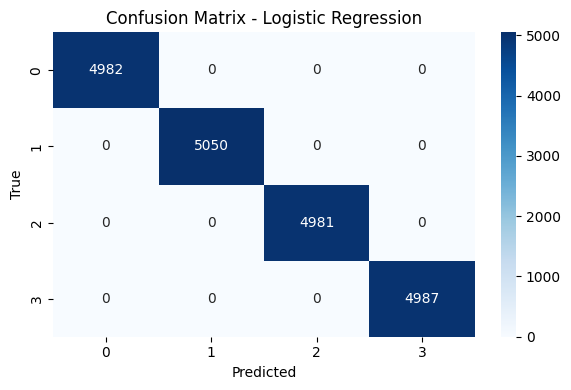


Confusion Matrix - Random Forest:
[[4982    0    0    0]
 [   0 5050    0    0]
 [   0    0 4981    0]
 [   0    0    0 4987]]


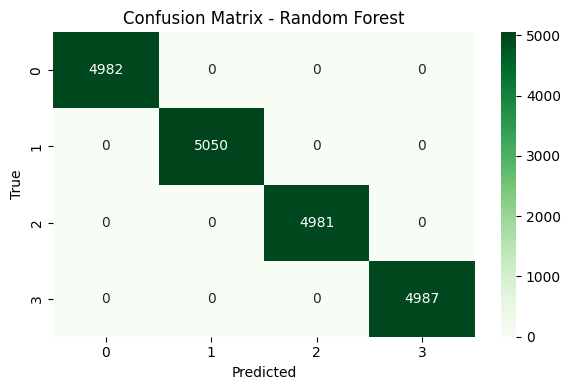

In [5]:
# Prediksi pada data uji
y_pred_logistic = logistic_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)

# Menghitung metrik evaluasi
logistic_acc = accuracy_score(y_test, y_pred_logistic)
logistic_f1 = f1_score(y_test, y_pred_logistic, average='weighted')

rf_acc = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

print("\nHasil Evaluasi pada Data Uji:")
print(f"Logistic Regression - Accuracy: {logistic_acc:.4f}, F1-Score: {logistic_f1:.4f}")
print(f"Random Forest - Accuracy: {rf_acc:.4f}, F1-Score: {rf_f1:.4f}")

# Confusion Matrix untuk Logistic Regression
print("\nConfusion Matrix - Logistic Regression:")
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
print(conf_matrix_logistic)

# Visualisasi Confusion Matrix untuk Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_logistic, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# Confusion Matrix untuk Random Forest
print("\nConfusion Matrix - Random Forest:")
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix_rf)

# Visualisasi Confusion Matrix untuk Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

## **c. Analisis Hasil Evaluasi Model Klasifikasi**

Hasil evaluasi menunjukkan bahwa kedua model, yaitu Logistic Regression dan Random Forest, memiliki performa yang sangat baik pada data uji dengan nilai **Akurasi** dan **F1-Score** mencapai 1.0000. 

#### **Interpretasi Hasil:**
1. **Logistic Regression**:
   - Logistic Regression adalah model yang bekerja optimal untuk data yang memiliki hubungan linier. Dalam kasus ini, hasil confusion matrix menunjukkan bahwa model mampu memprediksi seluruh label cluster dengan benar tanpa adanya kesalahan klasifikasi.
   - Model ini dapat diandalkan untuk interpretasi sebab sifatnya yang transparan dan memberikan informasi tentang kontribusi setiap fitur.

2. **Random Forest**:
   - Random Forest, yang menggunakan pendekatan ensemble, menunjukkan hasil yang sama baiknya dengan Logistic Regression. Model ini sangat efektif untuk menangani data dengan hubungan non-linier dan menangkap interaksi antar fitur.
   - Confusion matrix menunjukkan tidak adanya kesalahan prediksi untuk setiap cluster, yang menunjukkan model memiliki generalisasi yang sangat baik terhadap data.

#### **Kesimpulan**:
- Kedua model sangat baik dalam memprediksi cluster dengan data yang diberikan.
- Akurasi yang sempurna harus dianalisis lebih lanjut untuk mengidentifikasi potensi overfitting, mengingat model mungkin terlalu terfokus pada data latih karena data yang terstruktur atau cluster yang terdistribusi dengan jelas.


# **5. Eksport Dataset Klasifikasi**

In [6]:
# Mengekspor hasil klasifikasi
dataset['Predicted_Cluster'] = logistic_model.predict(X)
output_file_classification = "Hasil_Klasifikasi_Final.csv"
dataset.to_csv(output_file_classification, index=False)
print(f"Dataset hasil klasifikasi telah disimpan ke file: {output_file_classification}")

Dataset hasil klasifikasi telah disimpan ke file: Hasil_Klasifikasi_Final.csv
